In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [3]:
df = pd.read_csv("wine_train.csv")

In [4]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))
# See the first five rows of the dataset
df.head()

Rows, columns: (3673, 12)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.2,6
1,8.2,0.420,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,7
2,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8
3,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6
4,7.4,0.300,0.30,5.2,0.053,45.0,163.0,0.99410,3.12,0.45,10.3,6


In [5]:
# Missing Values
print(df.isna().sum())

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


(array([  14.,  123.,    0., 1071.,    0., 1647.,  671.,    0.,  143.,
           4.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

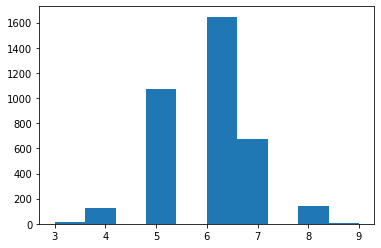

In [6]:
plt.pyplot.hist(df.quality)

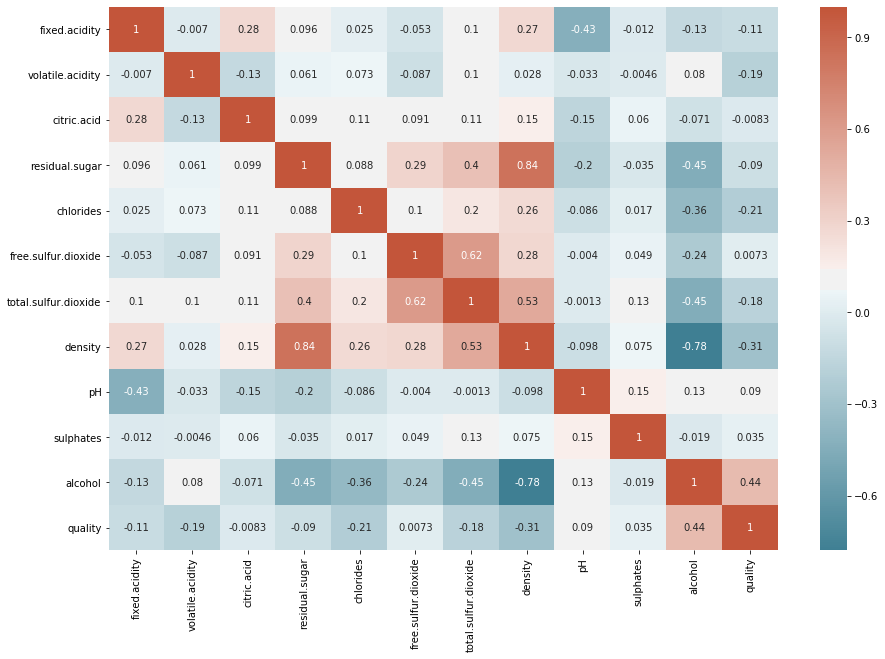

In [7]:
corr = df.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [8]:
# Create Classification version of target variable
df['goodquality'] = ['good' if x >= 7 else 'normal' if x==6 else 'bad' for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

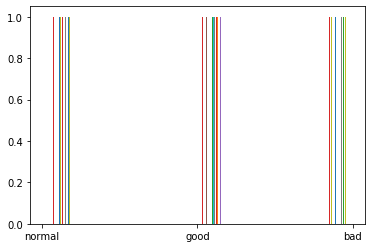

In [9]:
plt.pyplot.hist(y)

In [10]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

normal    1647
bad       1208
good       818
Name: goodquality, dtype: int64

In [11]:
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.2
1,8.2,0.420,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8
2,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9
3,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3
4,7.4,0.300,0.30,5.2,0.053,45.0,163.0,0.99410,3.12,0.45,10.3


#### Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# create a scaler object
scaler = MinMaxScaler()

In [14]:
# fit and transform the data
X = scaler.fit_transform(X)

In [15]:
X

array([[0.5       , 0.16176471, 0.22891566, ..., 0.19266055, 0.13157895,
        0.35483871],
       [0.42307692, 0.33333333, 0.1746988 , ..., 0.25688073, 0.09210526,
        0.77419355],
       [0.25      , 0.1372549 , 0.19277108, ..., 0.37614679, 0.39473684,
        0.46774194],
       ...,
       [0.40384615, 0.17647059, 0.1686747 , ..., 0.36697248, 0.40789474,
        0.32258065],
       [0.27884615, 0.06862745, 0.1746988 , ..., 0.73394495, 0.25      ,
        0.35483871],
       [0.25      , 0.14705882, 0.15662651, ..., 0.36697248, 0.31578947,
        0.22580645]])

In [16]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=0)

Decision Tree

In [17]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))
print(model1.score(X_test,y_test))

              precision    recall  f1-score   support

         bad       0.73      0.68      0.70       124
        good       0.60      0.63      0.61        83
      normal       0.64      0.66      0.65       161

    accuracy                           0.66       368
   macro avg       0.66      0.66      0.66       368
weighted avg       0.66      0.66      0.66       368

0.6603260869565217


In [18]:
?RandomForestClassifier

Object `RandomForestClassifier` not found.


### max accuracy

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
# max_depth = 50, min_samples_split=10, random_state=1
model2 = RandomForestClassifier(random_state=1, max_depth=50, min_samples_split=10)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))
print(model2.score(X_test, y_test))

              precision    recall  f1-score   support

         bad       0.73      0.77      0.75       124
        good       0.64      0.54      0.59        83
      normal       0.65      0.68      0.67       161

    accuracy                           0.68       368
   macro avg       0.68      0.66      0.67       368
weighted avg       0.68      0.68      0.68       368

0.6793478260869565


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### AdaBoost Classifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))
print(model3.score(X_test, y_test))

              precision    recall  f1-score   support

         bad       0.66      0.69      0.67       124
        good       0.53      0.47      0.50        83
      normal       0.59      0.61      0.60       161

    accuracy                           0.60       368
   macro avg       0.60      0.59      0.59       368
weighted avg       0.60      0.60      0.60       368

0.6032608695652174


### Gradient Boosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         bad       0.72      0.68      0.70       124
        good       0.62      0.53      0.57        83
      normal       0.61      0.68      0.64       161

    accuracy                           0.64       368
   macro avg       0.65      0.63      0.64       368
weighted avg       0.65      0.64      0.64       368



!pip install xgboost

import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))